In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np




import csv
import pandas as pd




from numpy.polynomial.polynomial import polyfit

In [2]:
source =  r"E:\Downloads\ManducaMultiSenseData\Motion\Centroids_Filtered"

In [3]:
df = pd.read_csv(source + '/L0.1_c-3_m2_0_27647.csv')

In [4]:
x,y = df.X_position.values, df.Y_position.values
y_line = np.arange(0,488, (488/648))*2.4/75
x_line = np.arange(0,648, 1)*2.4/75

Text(0.5, 0, 'X Position')

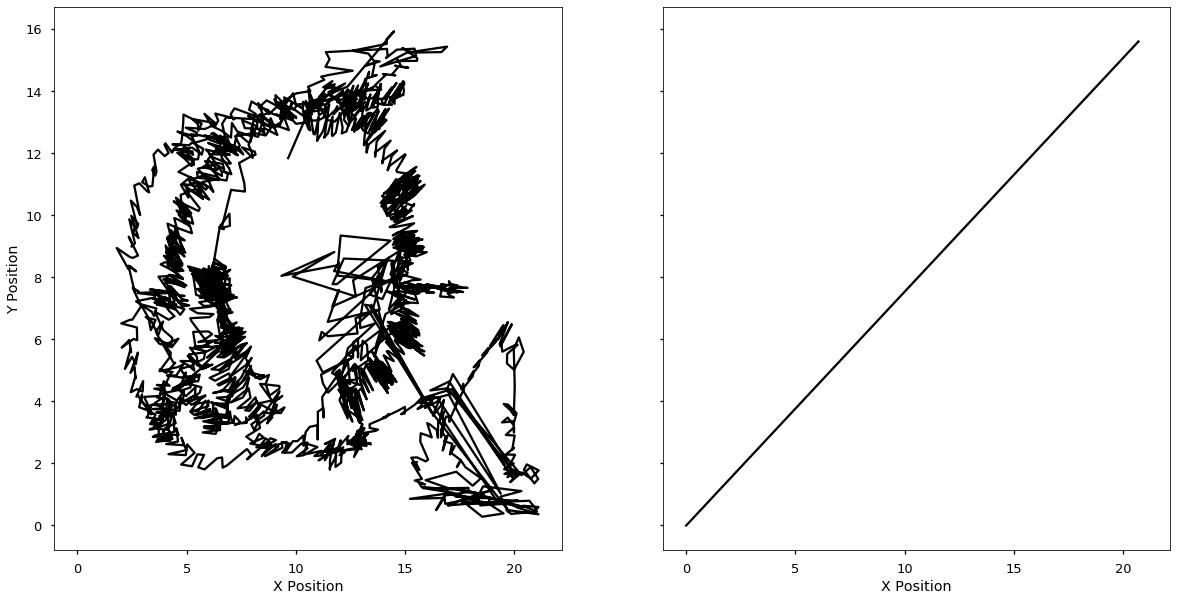

In [5]:
f, ax = plt.subplots(1,2,figsize = (20,10), sharex = True, sharey = True)
ax[0].plot(x,y, c= "k")
ax[0].set_ylabel("Y Position")
ax[0].set_xlabel("X Position")
ax[1].plot(x_line,y_line, c= "k")
ax[1].set_xlabel("X Position")

number of boxes:4 out of 4 dimension: 2.0
number of boxes:15 out of 16 dimension: 1.9534452978042594
number of boxes:52 out of 64 dimension: 1.9001465727136977
number of boxes:161 out of 256 dimension: 1.8327292195286544
number of boxes:466 out of 1024 dimension: 1.772837228930856
number of boxes:1139 out of 4096 dimension: 1.6922586719513522


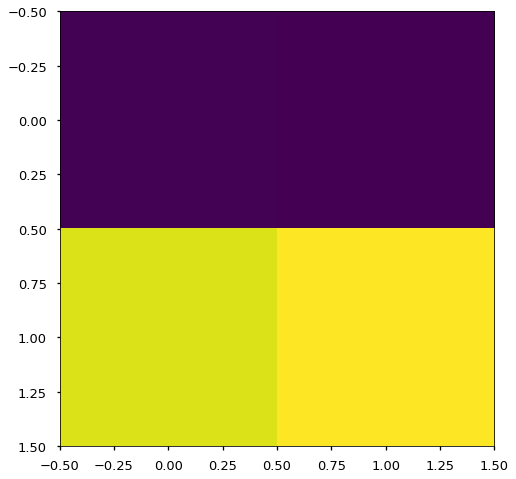

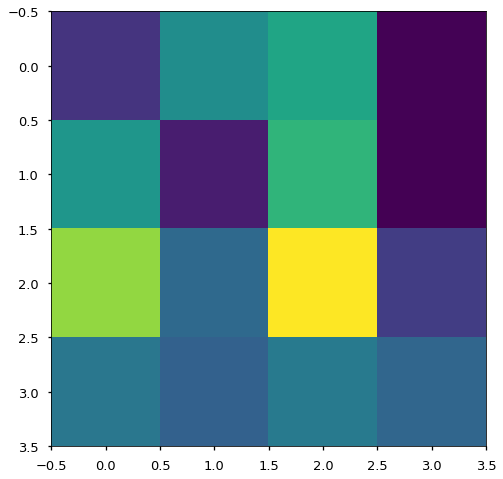

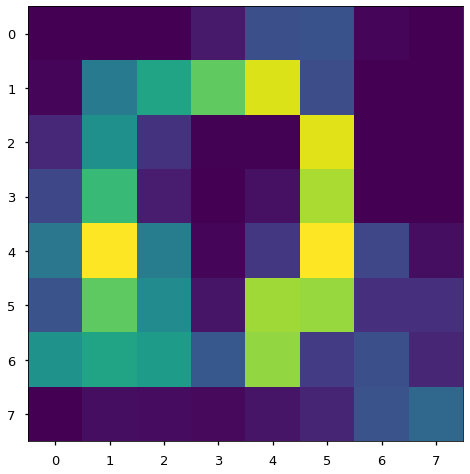

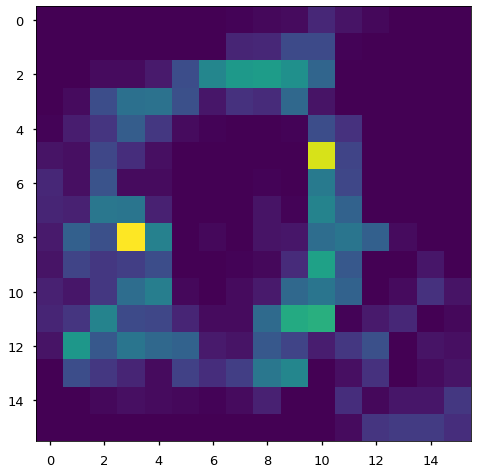

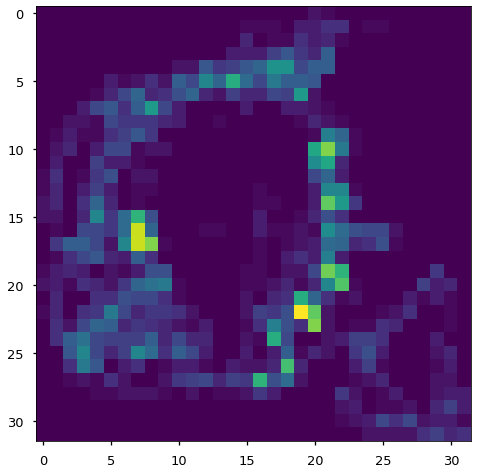

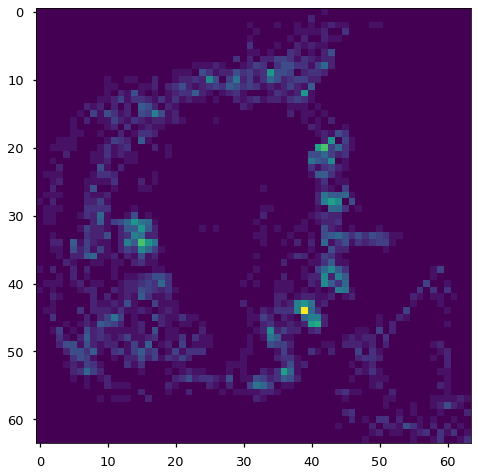

In [6]:
highest_power = 6 #limit the number of boxes to ensure object is continous (could also fill the trajectories to make continous)
scale = np.logspace(1, highest_power, num = highest_power, base = 2) #create a log scale. total number of boxes doubles each time
number_filled = []
dimensions = []
for b in scale:
    #use 2d histogram (heatmap) as boxes and measure the number of boxes to capture object as bins that have a non-zero count
    bins = b
    heatmap, xedges, yedges = np.histogram2d(-y, x, bins=int(bins)) 
    box_num = heatmap[heatmap > 0]
    number_filled.append(len(box_num))
    dimension = np.log(len(box_num))/np.log(b)
    dimensions.append(dimension)
    print("number of boxes:" + str(len(box_num)) + " out of " + str(len(heatmap.ravel())) + " dimension: " + str(dimension))
    f, ax = plt.subplots(figsize=(8,8))
    plt.imshow(heatmap)

Text(2, 7, 'dimension: 1.64')

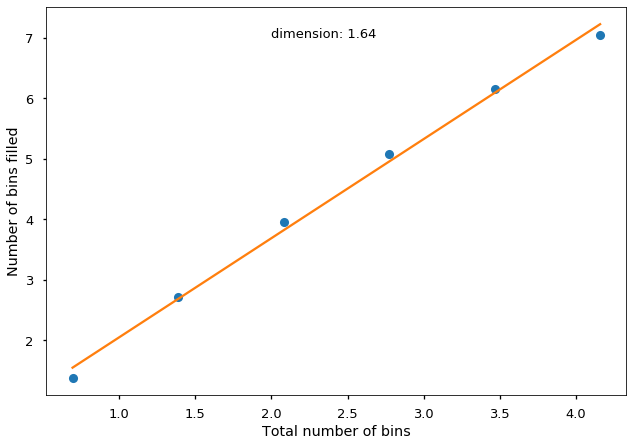

In [7]:
#visualize relationship between number of bins (1/boxlength) and how many boxes it takes to capture trajectory (number of bins with nonzero count)
#using log gives linear relationship between the two. slope of relationship is dimension of trajectory
plt.plot(np.log(scale), np.log(number_filled), "o") 
b, m = polyfit(np.log(scale), np.log(number_filled), 1) 
plt.plot(np.log(scale), b+ m*np.log(scale))
plt.ylabel("Number of bins filled")
plt.xlabel("Total number of bins")
plt.text(2,7, "dimension: " + "%.2f" % round(m, 2), size = 13)

In [8]:
#different visit durations could confound results, since moth likely overlaps its original position with longer visits 
# use sliding kernel to normalize results